## Assignment 04

**Goal -** This final assignment is designed to give you freedom in demonstrating what you have learned throughout the course. Your task is to develop a complete data analysis project on a classification problem of your choice. You are encouraged to explore the topics and methods that you feel most
confident with—or that you want to experiment with further. The goal is not to follow a rigid set of instructions, but rather to showcase your skills, your analytical reasoning, and your ability to structure a coherent and well-justified workflow.

**Output Requirements -** The assignment must be submitted with a file containing **code, plots** and **brief interpretations**: all plots should have clear titles, labels and legends (when required) and each section should include at least one short commentary interpreting the results. The same file should be presented in the following formats:
- .ipynb
- .pdf

**General Requirements -**

• Your project must involve a supervised classification task.

• You are free to choose the dataset (public datasets are fine; you may also use datasets provided by us).

• Your work should follow a **clear narrative**, explaining what you are doing and why.

Beyond these points, everything is flexible: you decide what to include and how deep to go.

**Suggested Structure -**
You can follow the outline below, but you are free to adapt it, merge sections, expand some parts and skip others—as long as your choices are well-motivated.

• **Real-World Motivation & Problem Definition** (The real-world context of your classification problem. Why the problem matters. What is the response variable. What are the classes. What type of classification setting is it. You are free to select any dataset, but justify why it is interesting.

• **Exploratory Data Analysis** (Inspect dataset structure and variables. Summary statistics. Exploratory plots. Highlight potential challenges)

• **Preprocessing Pipeline** (Train/test split. Dealing with missing values. Encoding categorical variables. Feature scaling. Feature engineering. Dealing with class imbalance. Dimensionality reduction)

• **Unsupervised Analysis** (Clustering to explore structure. Dimensionality reduction for visualization. Using clustering as part of your preprocessing or feature engineering)

• **Model Building** (You have complete freedom here. Choose the models you want to try. Explain the intuition behind the model. Why you chose it .Any hyperparameter you decided to tune)

• **Model Tuning and Resampling** (K-fold cross-validation. Grid search. Comparison of validation curves)

• **Model Evaluation** (Choose appropriate metrics based on your problem. You can present results for a single model or compare multiple models. The key is to explain what your results mean)

• **Interpretation and Insights** (Depending on the models. Variable importance. Decision boundaries. Tree visualization, ecc…)

• **Final Discussion** (A brief summary. What you learned about the data. What worked well and what didn’t. Whether your model(s) performed well enough. What could be improved with more time or data. Any “real-world” implications of your model)

## Real-World Motivation & Problem Definition

The dataset we choose is the **Students_Habits** dataset.
The features are
- student_id
- age
- gender
- study_hours_per_day
- social_media_hours
- netflix_hours
- part_time_job
- attendance_percentage
- sleep_hours
- diet_quality
- exercise_frequency
- parental_education_level
- internet_quality
- mental_health_rating
- extracurricular_participation
- exam_score

The goal of this project is to predict a student’s academic performance level based on their study habits, lifestyle, and background characteristics. The dataset contains information about how much time students spend studying and on social media, how much they sleep and exercise, their attendance, self-reported mental health, and several contextual variables such as diet quality, internet quality, and parental education level. The original exam score is converted into a three-level target variable (`performance_level`), with classes **Low**, **Medium**, and **High**.

This problem is interesting from an educational point of view because it can help identify patterns associated with lower performance and highlight behaviours that tend to correlate with better exam outcomes. In practice, such models could support early-warning systems or personalized feedback tools that help students (and educators) focus on the most relevant aspects of their study habits. Formally, the task is a **multi-class classification problem** in which the input features are a mix of numeric and categorical variables, and the objective is to correctly assign each student to one of the three performance levels.


## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Firstly we explore the dataset to understand its structure and main patterns. The EDA focuses on **three** aspects:
* The distribution of individual variables (such as study hours, social media usage, sleep, and attendance),
* The relationships between these variables and the performance levels, and
* Potential issues such as skewed distributions or strong correlations. This step provides intuition about which features might be important for prediction and helps to justify later preprocessing and modelling choices.


In [4]:
# Import the data
df = pd.read_csv('student_habits_performance.csv') # df is the dataframe where the dataset is stored
df.head() # head() prints the first 5 rows from the dataset

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.info() # info() can print the variable name, number of not null values of the rows and the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1002 non-null   object 
 1   age                            1002 non-null   int64  
 2   gender                         1002 non-null   object 
 3   study_hours_per_day            1002 non-null   float64
 4   social_media_hours             1002 non-null   float64
 5   netflix_hours                  1002 non-null   float64
 6   part_time_job                  1002 non-null   object 
 7   attendance_percentage          1002 non-null   float64
 8   sleep_hours                    1002 non-null   float64
 9   diet_quality                   995 non-null    object 
 10  exercise_frequency             1002 non-null   int64  
 11  parental_education_level       911 non-null    object 
 12  internet_quality               1002 non-null   o

In [5]:
df.shape # shape prints the number of (rows, columns)

(1002, 16)

In [6]:
df.isnull().sum() # it prints the total number of null values for each column

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,7


In [7]:
df = df.drop_duplicates() # it will remove any duplicate rows present in the dataset
df = df.dropna(subset=['diet_quality']) # diet_quality have very low missing values and it will not have that much effect on our data analysis. Hence it is being removed
df['parental_education_level'] = df['parental_education_level'].fillna('No Formal Education') # the null values are being replaces by None in the column parental_education_level. Here None refers to no educational level
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [8]:
# Create performance_level using pd.cut
df["performance_level"] = pd.cut(
    df["exam_score"],
    bins=[-np.inf, 60, 80, np.inf],        # (-inf,60), [60,80), [80, inf)
    labels=["Low", "Medium", "High"],
    right=False                           # interval includes left bound, excludes right
)

print(df["performance_level"].value_counts())

performance_level
Medium    441
High      277
Low       275
Name: count, dtype: int64


In [9]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumeric columns:")
print(numeric_cols)

print("\nCategorical columns:")
print(categorical_cols)


Numeric columns:
['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

Categorical columns:
['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'performance_level']


In [10]:
# Create a list of numeric feature columns excluding id and target
feature_numeric_cols = [col for col in numeric_cols if col not in ["exam_score"]]

print("\nNumeric feature columns for modelling:")
print(feature_numeric_cols)

feature_categorical_cols = [col for col in categorical_cols if col not in ["student_id"]]

print("\nCategorial feature columns for modelling:")
print(feature_categorical_cols)


Numeric feature columns for modelling:
['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

Categorial feature columns for modelling:
['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'performance_level']


In [11]:
df[feature_numeric_cols].describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,20.497482,3.554985,2.507654,1.815911,84.091742,6.474421,3.045317,5.453172
std,2.307562,1.470516,1.174941,1.076700,9.381287,1.229218,2.027771,2.847975
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000
25%,19.000000,2.600000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000
50%,20.000000,3.500000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000
75%,23.000000,4.500000,3.300000,2.500000,90.900000,7.300000,5.000000,8.000000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000


In [11]:
# Mean of numeric features by performance level
print("\nMean of numeric features by performance level:")
print(df.groupby("performance_level", observed=False)[feature_numeric_cols].mean())


Mean of numeric features by performance level:
                         age  study_hours_per_day  social_media_hours  \
performance_level                                                       
Low                20.541818             2.041818            2.749818   
Medium             20.467120             3.570975            2.547166   
High               20.501805             5.031769            2.204332   

                   netflix_hours  attendance_percentage  sleep_hours  \
performance_level                                                      
Low                     2.037091              83.253818     6.291636   
Medium                  1.805669              83.726984     6.458503   
High                    1.612635              85.504332     6.681227   

                   exercise_frequency  mental_health_rating  
performance_level                                            
Low                          2.734545              4.461818  
Medium                       3.004535  

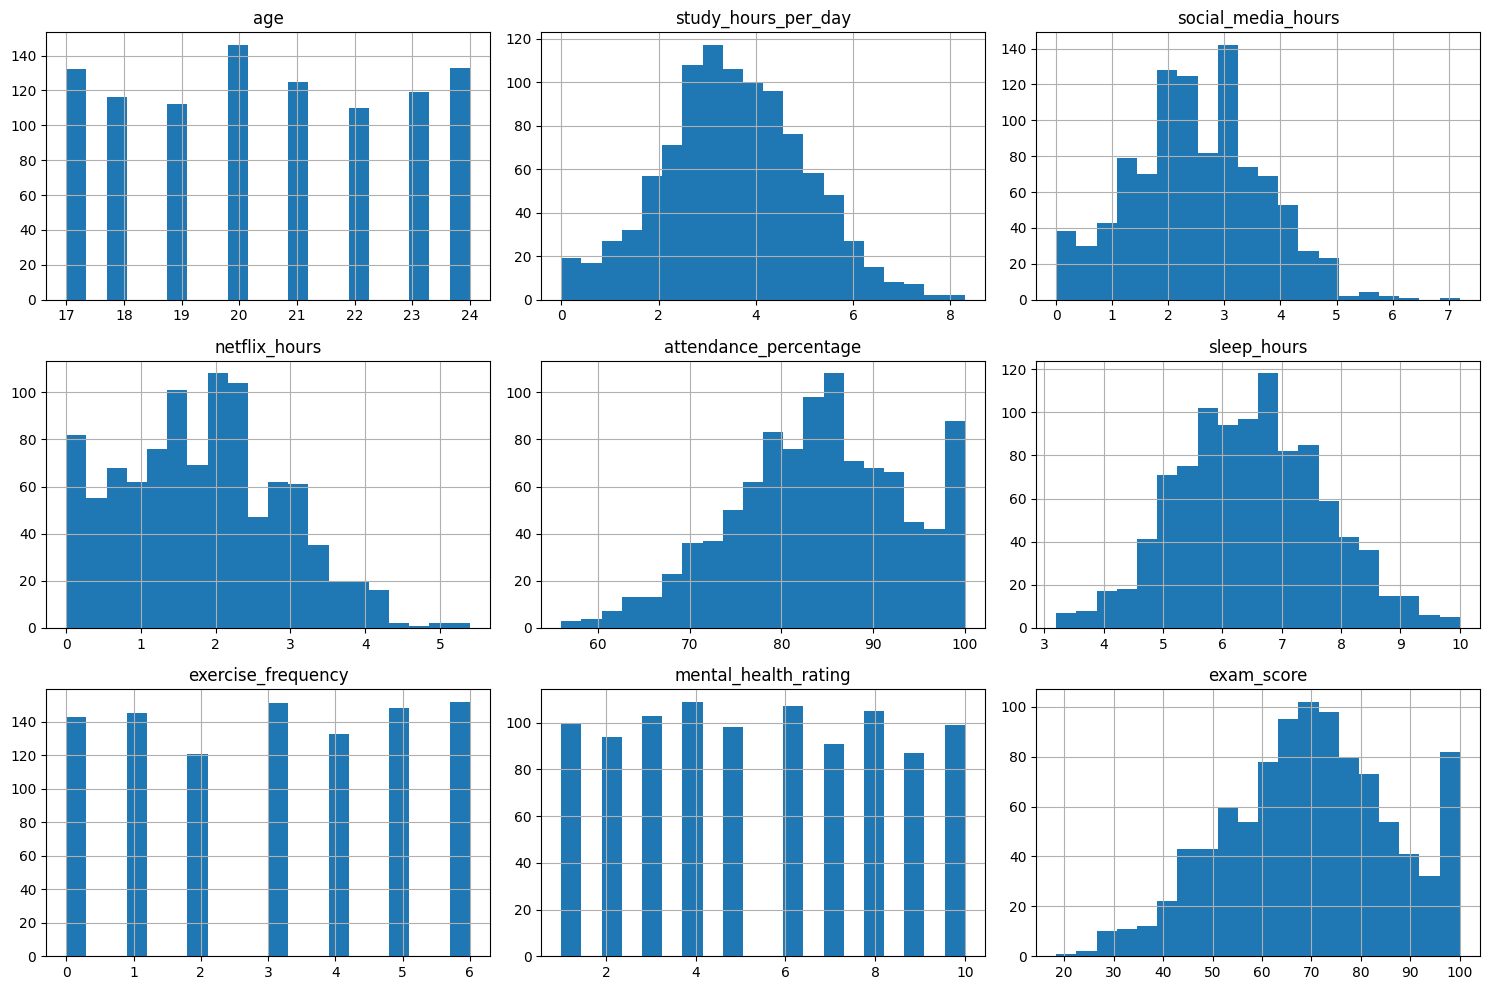

In [12]:
# With histograms we can see the overall distribution shape, peak values and gaps in the dataset.
numeric_columns = df.select_dtypes(include=[np.number]).columns

df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Histogram Observation

*age* - It is a **uniform** distribution.

*study_hours_per_day* - It shows a **bell-shaped normal** distribution with slight right tail.

*social_media_hours* - It is a **positively (right) skewed** distribution with a long right tail.

*netflix_hours* - It is also a **positively (right) skewed** distribution with slight right tail.

*attendance_percentage* - It is a **negatively (left) skewed** distribution with a tail extending to the left.

*sleep_hours* - It is a **bell shaped normal** distribution.

*exercise_frequency* - It is a **uniform** distribution.

*mental_health_rating* - It is a **uniform** distribution.

*exam_score* - It is a **negatively (left) skewed** distribution with a little left tail.

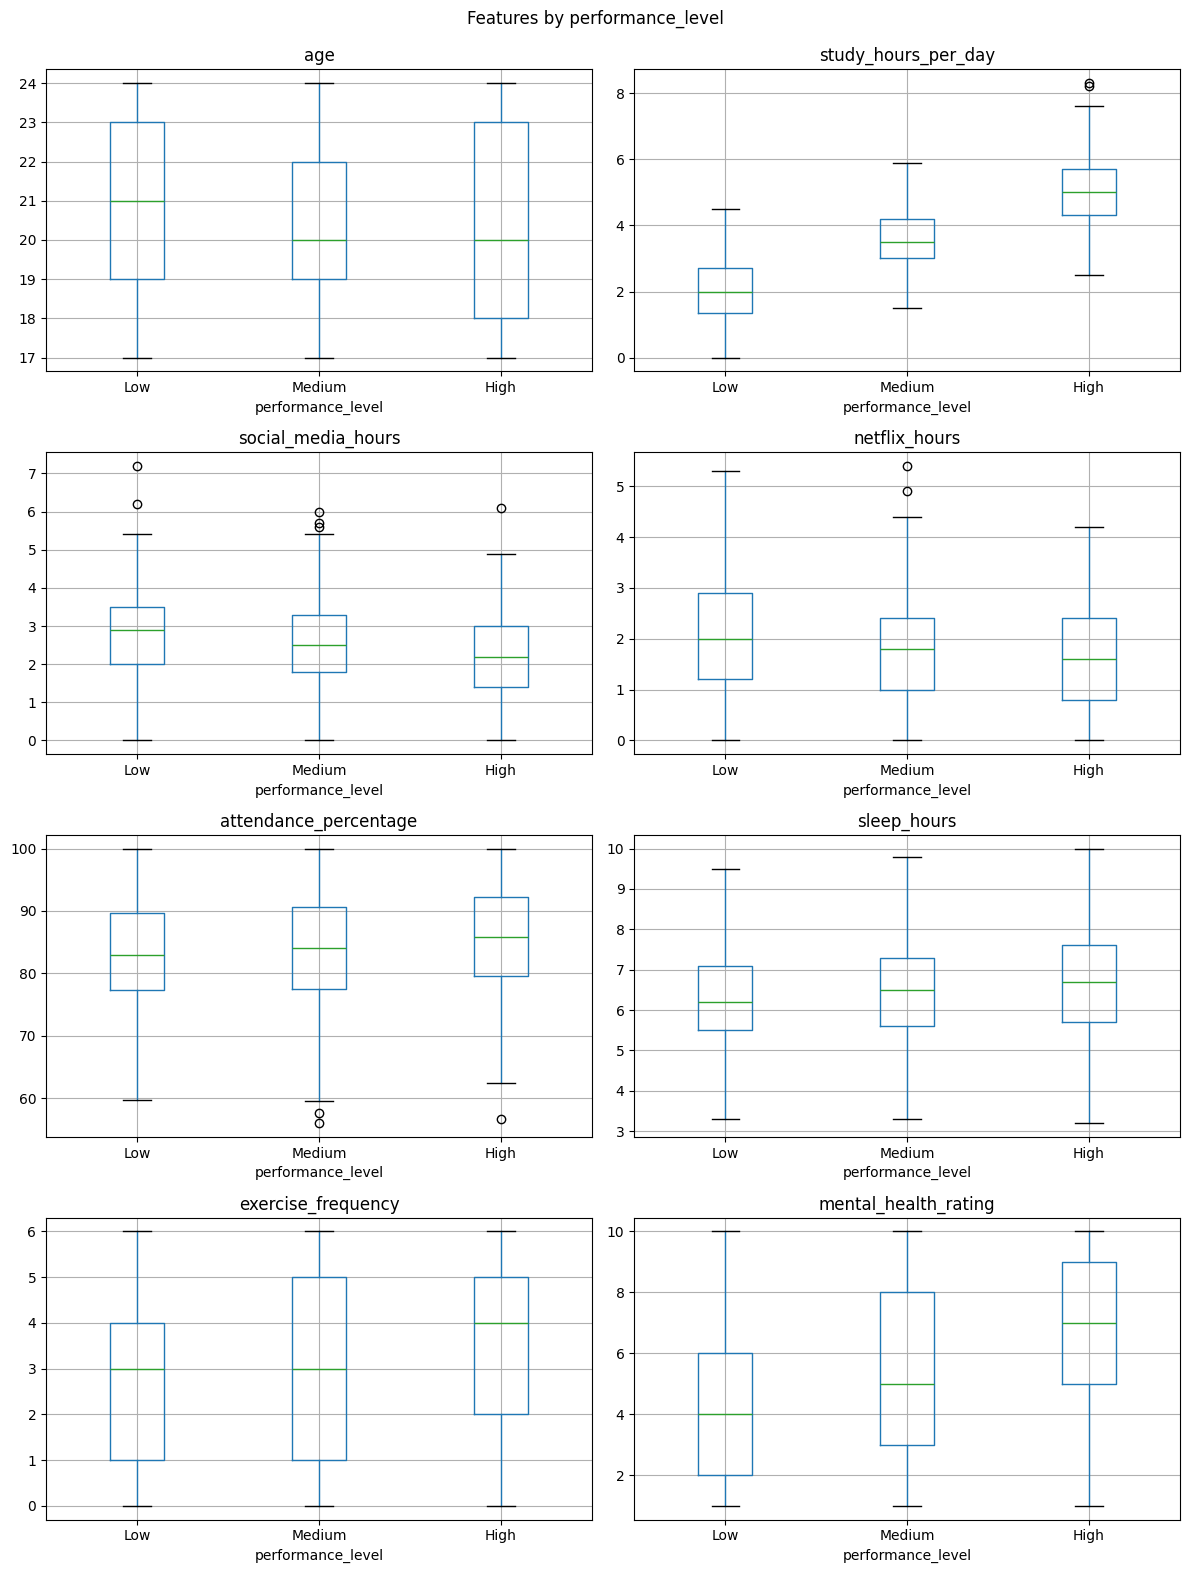

In [13]:
# Subset only those columns + the target
boxplot_df = df[feature_numeric_cols + ["performance_level"]]

# One call: multiple boxplots, all grouped by performance_level
axes = boxplot_df.boxplot(
    column=feature_numeric_cols,
    by="performance_level",
    layout=(4, 2),          # 4 rows, 2 columns of subplots (adjust if needed)
    figsize=(12, 16),
    sharex=False,
    sharey=False
)

plt.suptitle("Features by performance_level\n")  # overall title
plt.tight_layout()
plt.show()

The boxplots compare the distributions of the main numeric features across the three performance levels (Low, Medium, High). The plots suggest that **habits** and **lifestyle** factors are related to exam performance, although the groups still overlap.

* **Study hours per day**: There is a clear **upward** trend: Low-performing students study the least, Medium in the middle, and High-performing students study the most with some outliers present.

* **Social media & Netflix hours**: The **median** of social media and Netflix is **slightly higher** for Low performers and lower for High performers, indicating that more screen time for leisure is weakly associated with lower performance.

* **Attendance percentage**: Attendance shows a **strong pattern**: High-performing students have the highest attendance, followed by Medium, while Low performers have the lowest median attendance.

* **Sleep hours & exercise frequency**: High and Medium performers tend to sleep a bit more and exercise slightly more often than Low performers, but the distributions overlap substantially.

* **Mental health rating**: The **median** of mental-health rating **increases** from Low to High performance, suggesting that better self-reported mental health is associated with better exam results.

* **Age**: Age distributions are very similar across the three groups, indicating that age is not strongly related to performance in this dataset.

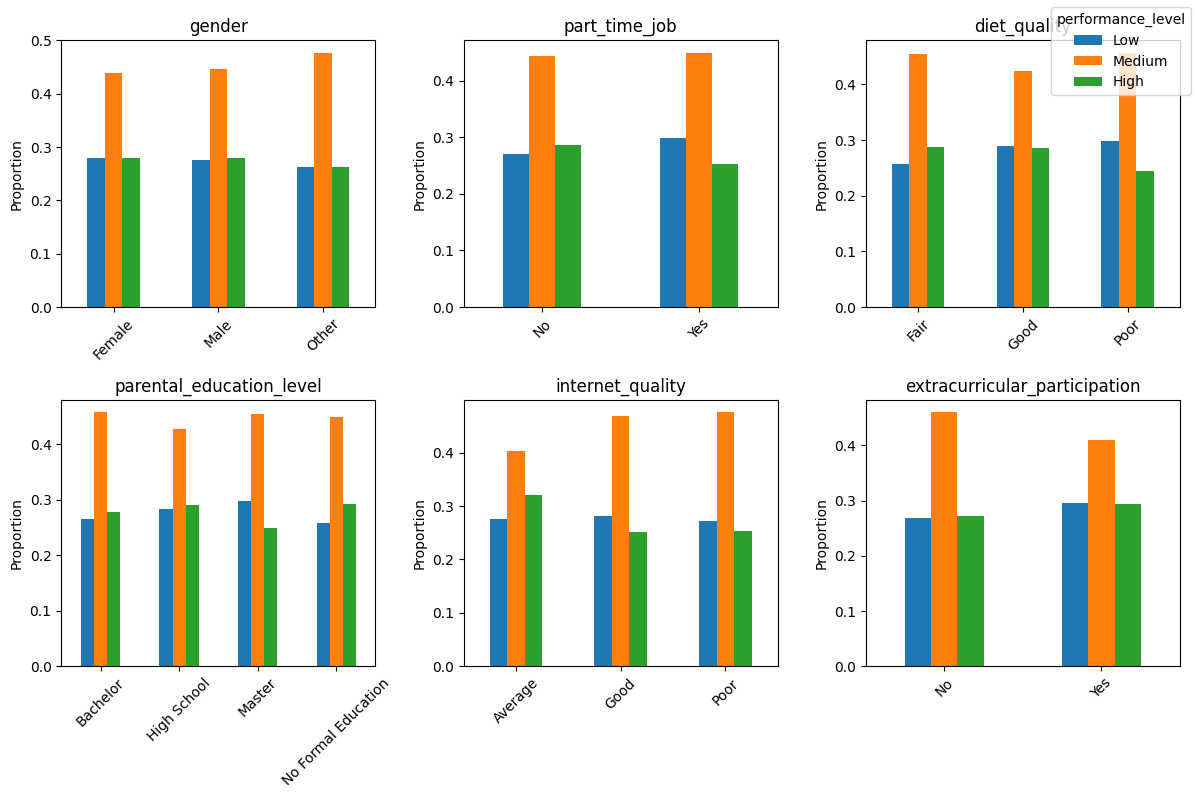

In [14]:
# Bar chart showing comparison with perfomance level and categories
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # smaller overall size
axes = axes.ravel()  # make it a flat list: [ax0, ax1, ..., ax5]

for ax, col in zip(axes, feature_categorical_cols):
    ct_props = pd.crosstab(
        df[col],
        df["performance_level"],
        normalize="index"   # proportions within each category
    )

    ct_props.plot(kind="bar", ax=ax, legend=False)  # no legend on each subplot
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Proportion")
    ax.tick_params(axis="x", rotation=45)

# One shared legend for all subplots (from the first axis)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="performance_level", loc="upper right")

plt.tight_layout()
plt.show()


* The grouped bar charts for all categorical variables is to examine how the proportion of students in each performance level (Low, Medium, High) varies across different categories. This allows a visual comparison of whether certain categories are associated with a noticeably higher or lower proportion of high-performing students.
Overall, the bar charts suggest that the categorical variables are only weakly related to performance level:

* **Gender**: The distribution of Low, Medium, and High performers is very similar across Female, Male, and Other, indicating that gender does not appear to be strongly associated with exam performance in this dataset.

* **Part-time job**: Students with a part-time job show a **slightly higher** proportion of Low performers and a slightly lower proportion of High performers compared to those without a job, but the differences are small.

* **Diet quality & parental education**: The proportions of Low/Medium/High performers are broadly similar across different diet quality levels and parental education categories, with only minor variations. There is no clear, strong trend that better diet or higher parental education guarantees higher performance.

* **Internet quality & extracurricular participation**: The performance distributions across different internet quality levels and between students who do and do not participate in extracurricular activities are also quite similar, again suggesting only modest associations.

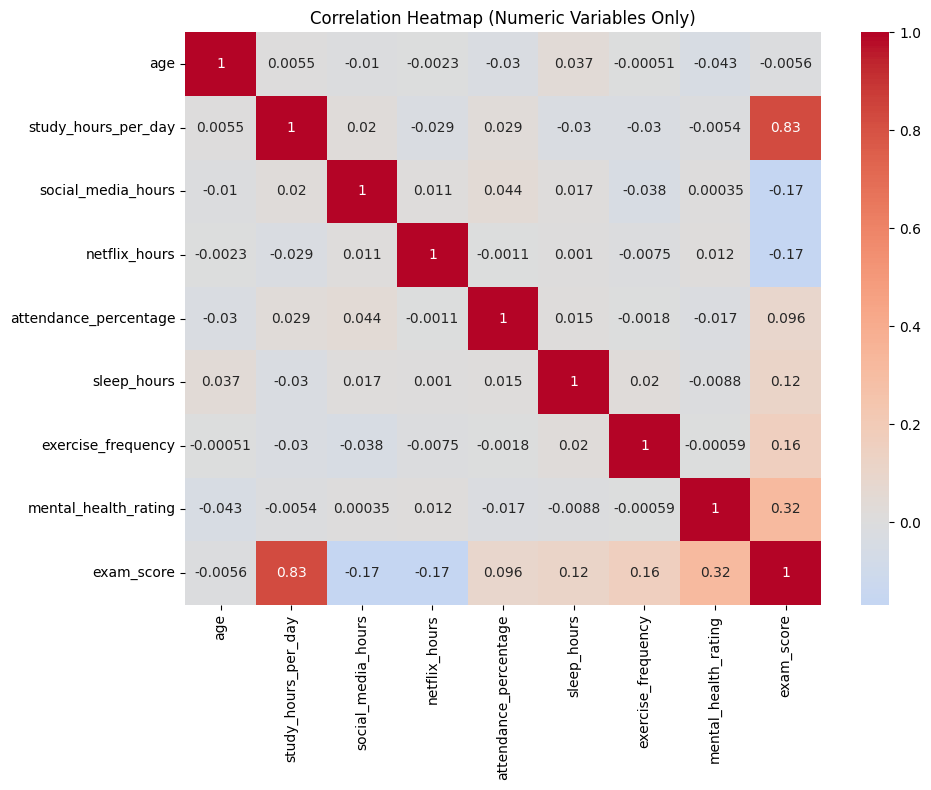

In [15]:
# Correlation matrix calculates how strongly each pair of numerical variables are related.
# Selecting only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])

# Correlation matrix calculation
correlation_matrix = numeric_cols.corr()

# A heatmap is a data visualization technique which uses color to represent data values.
# Creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numeric Variables Only)')
plt.tight_layout()
plt.show()

* We can see from the correlation matrix that the exam score is **positively correlated** with **study hours and attendance**, and **negatively correlated** with **social media** and **netflix usage**.
* **Mental health rating** and **sleep hours** also exhibit a **mild positive** correlation with exam score.

## Pre-processing Pipeline

* In this step we split the data into **training** and **test sets**, separate numeric and categorical features, and apply standardization to numeric variables and one-hot encoding to categorical variables using a unified ColumnTransformer pipeline.
This ensures that all models later use exactly the same preprocessing steps and prevents data leakage from the test set.

In [12]:
from sklearn.model_selection import train_test_split

# Define target
y = df["performance_level"]

# Define feature columns:
#    - Drop: student_id (id only), exam_score (used to create target), performance_level (target itself)
X = df.drop(columns=["student_id", "exam_score", "performance_level"])

print("Feature columns in X:")
print(X.columns)

# Train–test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,          # 20% test set (you can adjust to 0.25 if you want)
    random_state=42,
    stratify=y              # keep Low/Medium/High proportions similar
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Feature columns in X:
Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation'],
      dtype='object')

Train shape: (794, 14)
Test shape: (199, 14)

Class distribution in y_train:
performance_level
Medium    0.444584
High      0.278338
Low       0.277078
Name: proportion, dtype: float64

Class distribution in y_test:
performance_level
Medium    0.442211
High      0.281407
Low       0.276382
Name: proportion, dtype: float64


In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Pipeline for numeric features: just scaling
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Transformer for categorical features: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine them into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
# print("\nPreprocessor is ready.")

# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

# print("Shape before preprocessing:", X_train.shape)
# print("Shape after preprocessing:", X_train_transformed.shape)

Numeric features: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']
Categorical features: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


* For the preprocessing pipeline, we separated the predictors into numeric and categorical features based on their data types in the training set. This separation allows us to apply appropriate preprocessing steps (imputation, scaling, and encoding) to each group.
* Numeric variables are scaled to have zero mean and unit variance using StandardScaler, which is important for models that are sensitive to feature scale.
* Categorical variables are transformed using one-hot encoding with OneHotEncoder, allowing them to be used in standard machine learning models.

## Unsupervised Analysis

We will now analyze the data without using the labels to see what natural structure exists in the feature space. 
* **PCA** reduces the numeric features to a few components so we can visualize the data in 2D and check whether students with different performance levels form clearly separated groups.
* **K-means** clustering and its evaluation (contingency table and silhouette analysis) show how well unsupervised clusters align with the performance labels, which helps to understand how the class structure is and how hard the classification task might be.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create pipeline: scale/encode -> PCA
pca_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('pca', PCA())
])

# Fit PCA
pca_pipeline.fit(df)

# Extract PCA results
pca = pca_pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_

# Show explained variance by each component
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.2f} variance explained")


PC1: 0.10 variance explained
PC2: 0.09 variance explained
PC3: 0.09 variance explained
PC4: 0.09 variance explained
PC5: 0.09 variance explained
PC6: 0.09 variance explained
PC7: 0.08 variance explained
PC8: 0.08 variance explained
PC9: 0.04 variance explained
PC10: 0.04 variance explained
PC11: 0.04 variance explained
PC12: 0.04 variance explained
PC13: 0.03 variance explained
PC14: 0.03 variance explained
PC15: 0.02 variance explained
PC16: 0.02 variance explained
PC17: 0.02 variance explained
PC18: 0.01 variance explained
PC19: 0.01 variance explained
PC20: 0.00 variance explained
PC21: 0.00 variance explained
PC22: 0.00 variance explained
PC23: 0.00 variance explained
PC24: 0.00 variance explained
PC25: 0.00 variance explained


* After applying PCA to the fully preprocessed feature matrix it resulted in $25$ principal components, one for each transformed feature.
* The explained variance ratios show that the first few components each explain around $8–10$% of the total variance ($PC1 ≈ 10$%, $PC2–PC7 ≈ 9$%, $PC8 ≈ 8$%), while later components contribute progressively less (around $4$% for $PC9–PC12$ , $2–3$% for the next few, and almost $0$% for the last components).
* This pattern indicates that the information in the dataset is spread across many directions in feature space rather than being dominated by a single component.

In [19]:
X_num = df[numeric_features]

# Standardize the numeric features
scaler_pca = StandardScaler()
X_num_scaled = scaler_pca.fit_transform(X_num)

# Run PCA to get 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_num_scaled)

print("Explained variance ratio of PC1 and PC2:")
print(pca.explained_variance_ratio_)
print("Total variance explained by first 2 PCs:", pca.explained_variance_ratio_.sum())

Explained variance ratio of PC1 and PC2:
[0.13615806 0.13261563]
Total variance explained by first 2 PCs: 0.26877369419549646


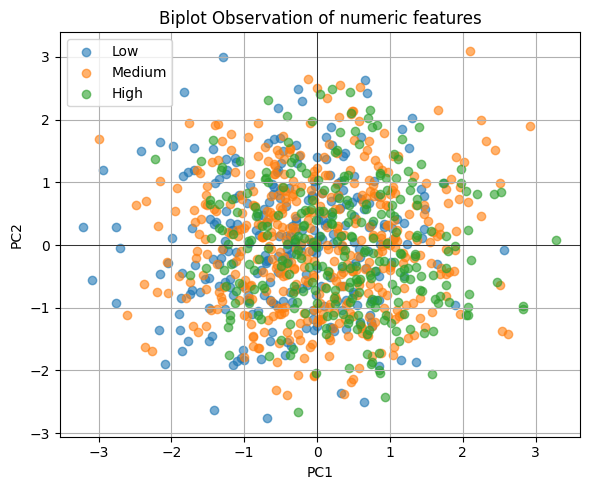

In [20]:
# Scatterplot of PC1 vs PC2, colored by performance_level
plt.figure(figsize=(6, 5))

for level in ["Low", "Medium", "High"]:
    mask = (df["performance_level"] == level)
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        alpha=0.6,
        label=level
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot Observation of numeric features")
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

* The first principal component $PC1$ explains about $13.6$% of the variance and the second $PC2$ explains about $13.3$%, so together they capture roughly $26.9$% of the total variability in the data.
* In the scatterplot of $PC1$ vs. $PC2$, where points are colored by performance level (Low, Medium, High), the three groups overlap heavily with **no clearly separated clusters**. This suggests that, in this reduced $2D$ space, students with different performance levels are mixed together and cannot be easily separated by a simple linear boundary, which confirms that the classification task is not trivial and that performance differences are relatively subtle.

* **K-means** is a good clustering algorithm in this case because the data has been scaled and reduced through PCA, making the transformed features continuous and well-suited for distance-based algorithms.
* After dimensionality reduction, the underlying structure becomes more compact and approximately spherical, which aligns with K-means assumptions.

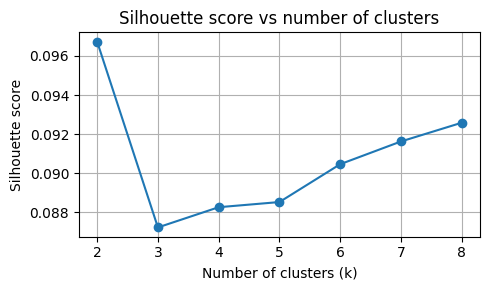

In [21]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning,
                        module='sklearn.cluster._kmeans')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 9)  # 2 to 8
sil_scores = []

for k in k_values:
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = kmeans_k.fit_predict(X_num_scaled)
    score_k = silhouette_score(X_num_scaled, labels_k)
    sil_scores.append(score_k)

plt.figure(figsize=(5, 3))
plt.plot(list(k_values), sil_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs number of clusters")
plt.tight_layout()
plt.grid(True)
plt.show()

The silhouette score measures how well-separated the clusters are, with higher values indicating more compact and better separated clusters.
* In the plot, the highest silhouette score occurs at $k = 2$, after which the score drops for $k = 3$ and then increases only slightly for larger $k$. Overall, all scores are quite low (around $0.09–0.096$), which indicates that the natural cluster structure in the data is weak and that no value of $k$ produces very well-separated clusters.
* Given that the labeled data naturally has three performance levels (Low, Medium, High), I choose $k = 3$ mainly for interpretability, while keeping in mind that the overall clustering quality is limited.

In [28]:
# k-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_num_scaled)

# Save cluster labels in the dataframe
df["cluster_k3"] = cluster_labels

print("Cluster counts:")
print(df["cluster_k3"].value_counts())

Cluster counts:
cluster_k3
1    374
0    332
2    287
Name: count, dtype: int64


In [29]:
# Contingency table: counts
ct_counts = pd.crosstab(df["cluster_k3"], df["performance_level"])
print("Cluster vs performance_level (counts):")
print(ct_counts)

# Contingency table: row-wise percentages
ct_props = pd.crosstab(
    df["cluster_k3"],
    df["performance_level"],
    normalize="index"      # each row sums to 1
) * 100

print("Cluster vs performance_level (row %):")
print(ct_props.round(1))

Cluster vs performance_level (counts):
performance_level  Low  Medium  High
cluster_k3                          
0                   82     151    99
1                  115     167    92
2                   78     123    86
Cluster vs performance_level (row %):
performance_level   Low  Medium  High
cluster_k3                           
0                  24.7    45.5  29.8
1                  30.7    44.7  24.6
2                  27.2    42.9  30.0


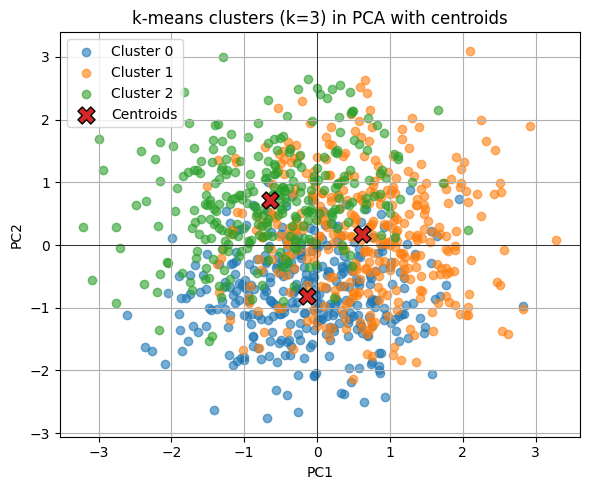

In [30]:
# Project centroids into PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(6, 5))

# Scatter for points, colored by cluster
for c in [0, 1,2]:
    mask = df["cluster_k3"] == c
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        alpha=0.6,
        label=f"Cluster {c}"
    )

# Plot centroids as larger markers
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker="X",   # big X marker
    s=150,        # size
    linewidths=1,
    edgecolors="black",
    label="Centroids"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("k-means clusters (k=3) in PCA with centroids")
plt.legend()
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

* The plot shows the k-means result with $k = 3$ in the $2D$ PCA space of the numeric features. Each point is a student, coloured by the cluster assigned by k-means, and the large X markers are the corresponding cluster centroids.
* We can see that the three clusters occupy slightly different regions (for example, **one cluster is more concentrated on the right**, **another one more on the lower-left**, and **another more toward the upper-left**), but there is still a lot of **overlap** between them and the centroids are relatively close to each other.
* This happens because the data do not contain strongly separated groups: students’ study habits and lifestyle variables vary gradually rather than forming distinct types. K-means is forced to split this continuous cloud into three parts, so the clusters it finds are only weakly separated.
* In addition, the plot is only a $2D$ projection ($PC1$ and $PC2$ capture only part of the **total variance**), so any separation that might exist in **higher dimensions** is compressed in this view.
* This explains why the clusters look **fuzzy and overlapping**, which is **consistent** with the **low silhouette scores** and the **contingency table** comparison with the performance labels.

## Model Building

In this step we train several supervised learning models that predict the student’s performance level (Low, Medium, High) from the preprocessed features. All models share the same preprocessing pipeline (standardization of numeric variables and one-hot encoding of categorical variables), so any performance differences are due to the modeling choices and not to differences in data preparation.
We choose three complementary models:

* **Logistic Regression** – This serves as a simple, interpretable linear baseline. It assumes a linear relationship between the features and the log-odds of each performance class, and its coefficients are easy to interpret in terms of how each variable is associated with higher or lower performance.

* **Support Vector Machine** (SVM, RBF kernel) – This model can learn non-linear decision boundaries and often performs well on medium-sized tabular datasets when the features are scaled. It allows us to see whether a more flexible, margin-based classifier can capture structure that logistic regression misses.

* **Random Forest** – This is a tree-based ensemble model that handles non-linear relationships and feature interactions automatically and is relatively robust to outliers. It also provides feature importance scores, which are useful later for interpreting which habits and background factors are most predictive of performance.

**Common Setup**

In [14]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
labels = ["Low", "Medium", "High"]


### **Logistic Regression**



**Model Pipline**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        random_state=42,
        multi_class="multinomial"
    ))
])


**Hyperparameter tuning (Grid Search)**

In [16]:
param_grid_lr = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l2"]
}

grid_lr = GridSearchCV(
    log_reg_pipe,
    param_grid=param_grid_lr,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print("Best Logistic Regression params:")
print(grid_lr.best_params_)
print(f"Best CV macro F1: {grid_lr.best_score_:.3f}")


Best Logistic Regression params:
{'model__C': 10, 'model__penalty': 'l2'}
Best CV macro F1: 0.837


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


**Training evaluation**

In [17]:
y_train_pred_lr = grid_lr.predict(X_train)

print("\nLogistic Regression – Classification report (TRAIN):")
print(classification_report(y_train, y_train_pred_lr, labels=labels))



Logistic Regression – Classification report (TRAIN):
              precision    recall  f1-score   support

         Low       0.89      0.85      0.87       220
      Medium       0.84      0.88      0.85       353
        High       0.90      0.87      0.89       221

    accuracy                           0.87       794
   macro avg       0.88      0.87      0.87       794
weighted avg       0.87      0.87      0.87       794



**Test evaluation**


Logistic Regression – Classification report (TEST):
              precision    recall  f1-score   support

         Low       0.90      0.82      0.86        55
      Medium       0.78      0.90      0.84        88
        High       0.92      0.79      0.85        56

    accuracy                           0.84       199
   macro avg       0.87      0.83      0.85       199
weighted avg       0.85      0.84      0.84       199



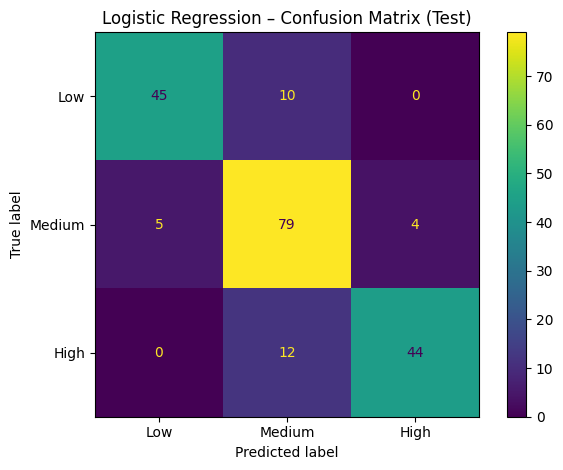

In [18]:
y_test_pred_lr = grid_lr.predict(X_test)

print("\nLogistic Regression – Classification report (TEST):")
print(classification_report(y_test, y_test_pred_lr, labels=labels))

cm_lr = confusion_matrix(y_test, y_test_pred_lr, labels=labels)
ConfusionMatrixDisplay(cm_lr, display_labels=labels).plot()
plt.title("Logistic Regression – Confusion Matrix (Test)")
plt.tight_layout()
plt.show()


**Key numbers:**
* Best CV macro F1: $0.837$

* Training macro F1: $0.87$
* Test macro F1: $0.85$
* Test accuracy: $0.84$


**Interpretation:**

* Logistic regression achieves strong and stable performance, with only a **small gap** between training, cross-validation, and test results. This suggests that much of the predictive signal in the data is **approximately linear** and that the model generalizes well to unseen students.

### **SVM**

**Model Pipline**

In [38]:
from sklearn.svm import SVC

svm_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", SVC(
        kernel="rbf",
        probability=True,
        random_state=42
    ))
])


**Hyperparameter tuning (Grid Search)**

In [39]:
param_grid_svm = {
    "model__C": [0.1, 1, 10],
    "model__gamma": ["scale", 0.01, 0.1]
}

grid_svm = GridSearchCV(
    svm_pipe,
    param_grid=param_grid_svm,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)

print("Best SVM params:")
print(grid_svm.best_params_)
print(f"Best CV macro F1: {grid_svm.best_score_:.3f}")


Best SVM params:
{'model__C': 10, 'model__gamma': 0.01}
Best CV macro F1: 0.830


**Training evaluation**

In [40]:
y_train_pred_svm = grid_svm.predict(X_train)

print("\nSVM – Classification report (TRAIN):")
print(classification_report(y_train, y_train_pred_svm, labels=labels))



SVM – Classification report (TRAIN):
              precision    recall  f1-score   support

         Low       0.93      0.87      0.90       220
      Medium       0.86      0.92      0.89       353
        High       0.93      0.89      0.91       221

    accuracy                           0.90       794
   macro avg       0.91      0.89      0.90       794
weighted avg       0.90      0.90      0.90       794



**Test evaluation**


SVM – Classification report (TEST):
              precision    recall  f1-score   support

         Low       0.90      0.80      0.85        55
      Medium       0.78      0.91      0.84        88
        High       0.94      0.80      0.87        56

    accuracy                           0.85       199
   macro avg       0.87      0.84      0.85       199
weighted avg       0.86      0.85      0.85       199



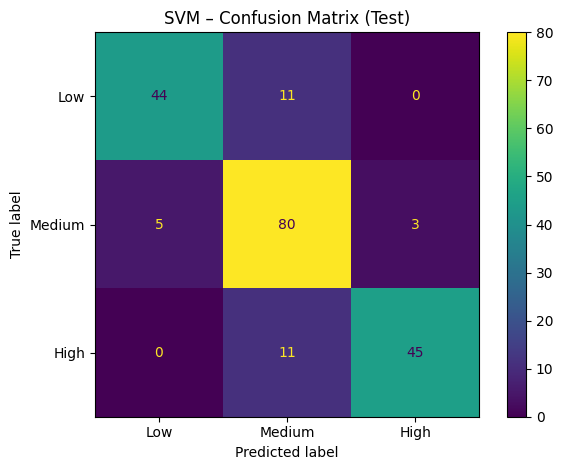

In [41]:
y_test_pred_svm = grid_svm.predict(X_test)

print("\nSVM – Classification report (TEST):")
print(classification_report(y_test, y_test_pred_svm, labels=labels))

cm_svm = confusion_matrix(y_test, y_test_pred_svm, labels=labels)
ConfusionMatrixDisplay(cm_svm, display_labels=labels).plot()
plt.title("SVM – Confusion Matrix (Test)")
plt.tight_layout()
plt.show()


**Key numbers:**

* Best CV macro F1: $0.830$

* Training macro F1: $0.90$
* Test macro F1: $0.85$
* Test accuracy: $0.85$

**Interpretation:**
* Although the SVM can model non-linear boundaries, its test performance is comparable to logistic regression, indicating that non-linear effects exist but are not dominant in this dataset.

### **Random Forest**

**Model Pipline**

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])


**Hyperparameter tuning**

In [43]:
param_grid_rf = {
    "model__n_estimators": [200, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [1, 5, 10]
}

grid_rf = GridSearchCV(
    rf_pipe,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Random Forest params:")
print(grid_rf.best_params_)
print(f"Best CV macro F1: {grid_rf.best_score_:.3f}")


Best Random Forest params:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
Best CV macro F1: 0.793


**Training evaluation**

In [44]:
y_train_pred_rf = grid_rf.predict(X_train)

print("\nRandom Forest – Classification report (TRAIN):")
print(classification_report(y_train, y_train_pred_rf, labels=labels))



Random Forest – Classification report (TRAIN):
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       220
      Medium       1.00      1.00      1.00       353
        High       1.00      1.00      1.00       221

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794



**Test evaluation**


Random Forest – Classification report (TEST):
              precision    recall  f1-score   support

         Low       0.81      0.76      0.79        55
      Medium       0.74      0.84      0.79        88
        High       0.91      0.77      0.83        56

    accuracy                           0.80       199
   macro avg       0.82      0.79      0.80       199
weighted avg       0.81      0.80      0.80       199



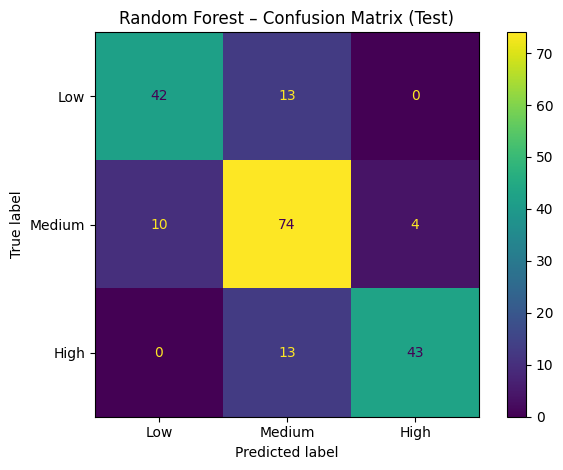

In [45]:
y_test_pred_rf = grid_rf.predict(X_test)

print("\nRandom Forest – Classification report (TEST):")
print(classification_report(y_test, y_test_pred_rf, labels=labels))

cm_rf = confusion_matrix(y_test, y_test_pred_rf, labels=labels)
ConfusionMatrixDisplay(cm_rf, display_labels=labels).plot()
plt.title("Random Forest – Confusion Matrix (Test)")
plt.tight_layout()
plt.show()


**Key numbers:**

* Training accuracy: $1.00$ 🚨

* CV macro F1: $0.793$

* Test macro F1: $0.80$

**Interpretation:**
* Despite achieving **perfect training performance**, the Random Forest model exhibits a substantial **drop** in cross-validation and test performance, indicating **overfitting**. This suggests that the model captures noise and idiosyncrasies of the training data rather than stable, generalizable patterns.

## Interpretation

* The Logistic Regression model allows direct interpretation of feature effects.
* Positive coefficients indicate variables that increase the likelihood of belonging to a given performance level, while negative coefficients decrease it.
* By comparing coefficients across classes, we identify which factors most strongly differentiate low, medium, and high-performing students.

**Extracting features names and coefficients**

In [32]:
import pandas as pd
import numpy as np

# Get fitted preprocessor from the best estimator of the GridSearchCV
preprocessor_fitted = grid_lr.best_estimator_.named_steps["preprocess"]

# Extract feature names
feature_names = preprocessor_fitted.get_feature_names_out()

print("Number of features seen by the model:", len(feature_names))

# Extract trained logistic regression model
log_reg_model = grid_lr.best_estimator_.named_steps["model"]

# Coefficient matrix: (n_classes, n_features)
coef = log_reg_model.coef_

print("Coefficient matrix shape:", coef.shape)

Number of features seen by the model: 25
Coefficient matrix shape: (3, 25)


**Coefficients table**

In [33]:
classes = log_reg_model.classes_

coef_df = pd.DataFrame(
    coef.T,                      # transpose: features × classes
    index=feature_names,
    columns=classes
)

coef_df


,High,Low,Medium
num__age,0.071465,-0.070033,-0.001432
num__study_hours_per_day,5.892640,-5.588058,-0.304582
num__social_media_hours,-1.495286,1.329170,0.166116
num__netflix_hours,-0.909513,0.894263,0.015250
num__attendance_percentage,0.505159,-0.582643,0.077484
num__sleep_hours,1.077290,-0.993478,-0.083813
num__exercise_frequency,1.162078,-1.195924,0.033846
num__mental_health_rating,2.187030,-1.963452,-0.223578
cat__gender_Female,-0.303217,-0.035447,0.338664
cat__gender_Male,-0.074528,-0.189715,0.264243


**Top positive drivers**

/tmp/ipython-input-4116371312.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos.values, y=top_pos.index, palette="viridis")


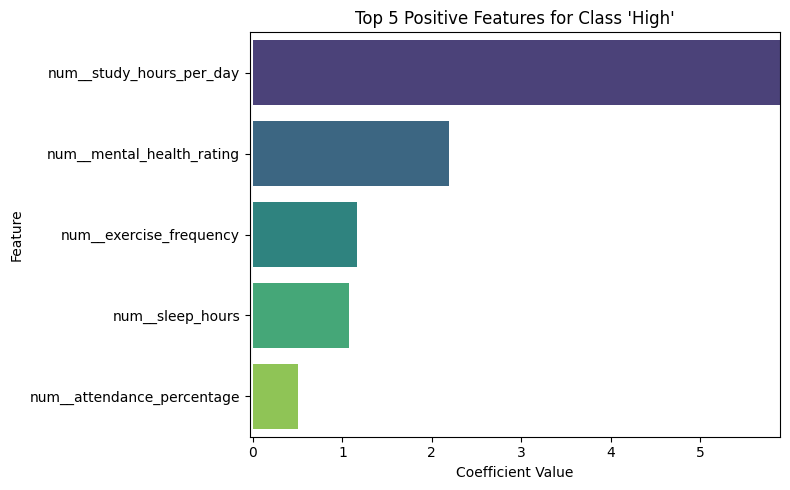

/tmp/ipython-input-4116371312.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos.values, y=top_pos.index, palette="viridis")


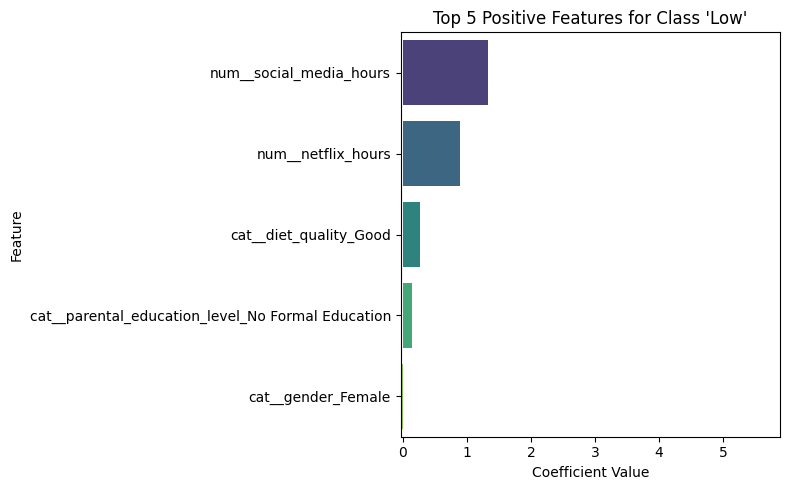

/tmp/ipython-input-4116371312.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos.values, y=top_pos.index, palette="viridis")


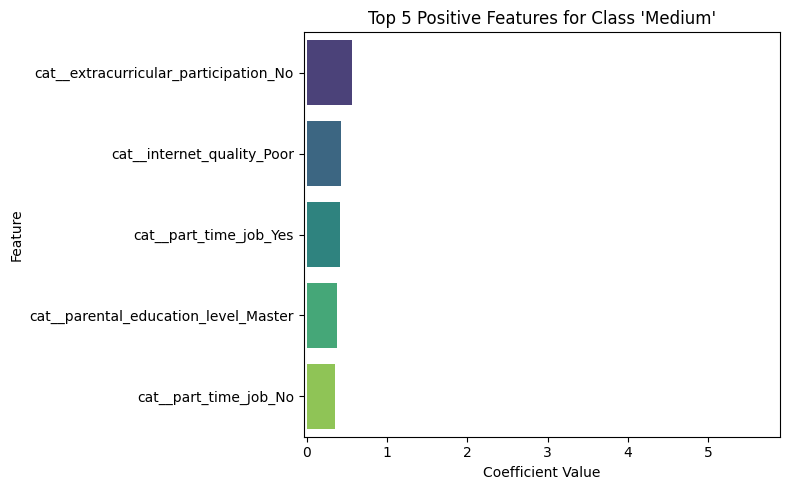

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

TOP_K = 5

# Compute global min and max for coefficient values across all classes
all_top_values = []
for cls in classes:
    top_pos = coef_df[cls].sort_values(ascending=False).head(TOP_K)
    all_top_values.extend(top_pos.values)

x_min = min(all_top_values)
x_max = max(all_top_values)

# Plot for each class with same x-axis
for cls in classes:
    top_pos = coef_df[cls].sort_values(ascending=False).head(TOP_K)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_pos.values, y=top_pos.index, palette="viridis")
    plt.title(f"Top {TOP_K} Positive Features for Class '{cls}'")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.xlim(x_min, x_max)  # same scale for all plots
    plt.tight_layout()
    plt.show()



**Top negative drivers**

/tmp/ipython-input-3047526586.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg.values, y=top_neg.index, palette="magma")


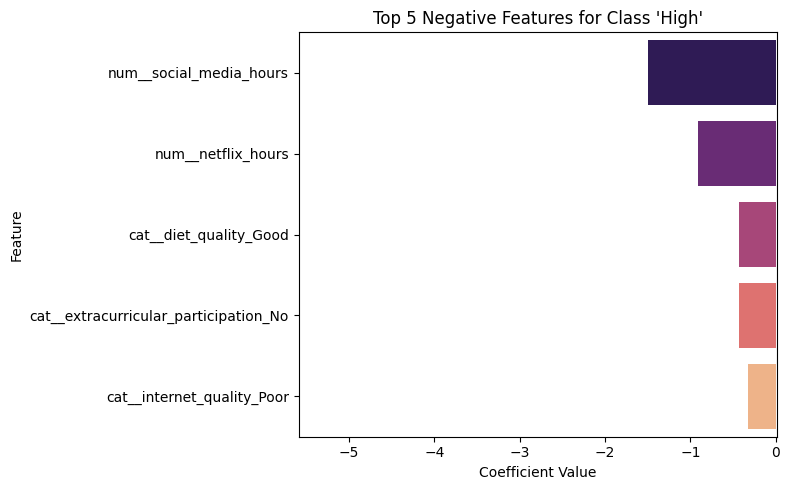

/tmp/ipython-input-3047526586.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg.values, y=top_neg.index, palette="magma")


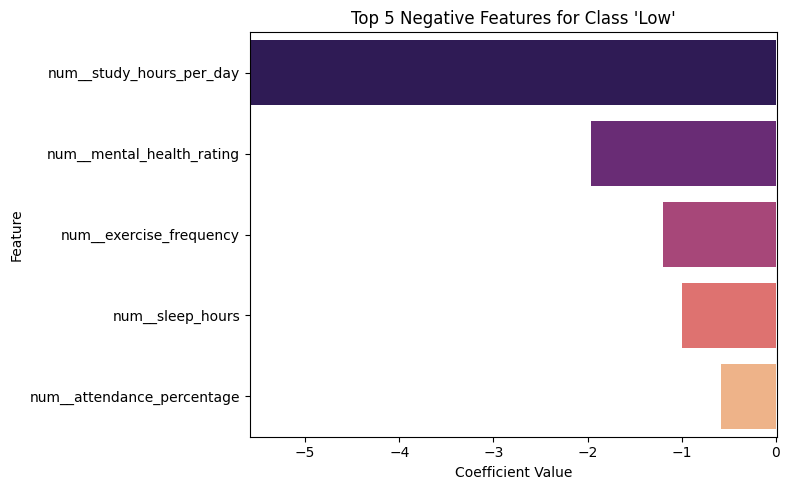

/tmp/ipython-input-3047526586.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg.values, y=top_neg.index, palette="magma")


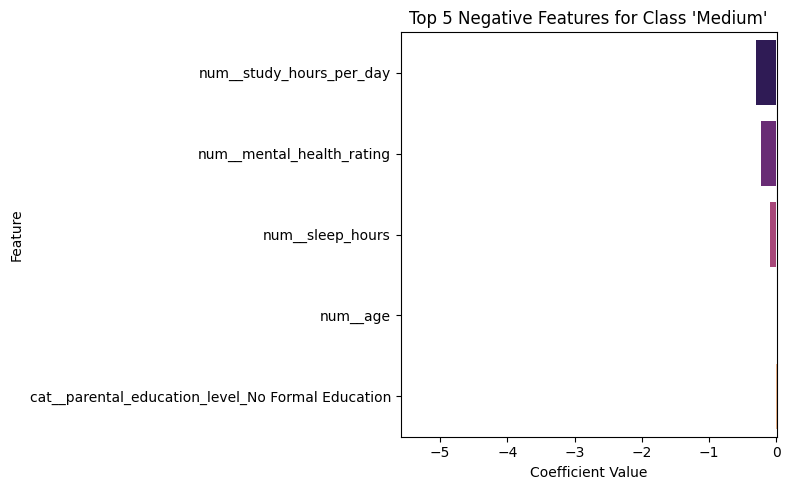

In [39]:
TOP_K = 5

# Compute global min and max for negative coefficients across all classes
all_neg_values = []
for cls in classes:
    top_neg = coef_df[cls].sort_values().head(TOP_K)  # smallest values
    all_neg_values.extend(top_neg.values)

x_min = min(all_neg_values)
x_max = max(all_neg_values)

# Plot for each class with same x-axis
for cls in classes:
    top_neg = coef_df[cls].sort_values().head(TOP_K)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_neg.values, y=top_neg.index, palette="magma")
    plt.title(f"Top {TOP_K} Negative Features for Class '{cls}'")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.xlim(x_min, x_max)  # same scale for all plots
    plt.tight_layout()
    plt.show()


**Odds Ratio**

In [37]:
import numpy as np

odds_ratio_df = np.exp(coef_df)

# Sort by maximum absolute deviation from 1 across classes
sort_index = (odds_ratio_df - 1).abs().max(axis=1).sort_values(ascending=False).index
odds_ratio_sorted = odds_ratio_df.loc[sort_index]

styled_odds = (
    odds_ratio_sorted
    .style
    .format("{:.2f}")
    .background_gradient(
        cmap="RdYlGn",
        axis=None,
        vmin=0.7,
        vmax=1.3
    )
    .applymap(
        lambda x: "background-color: white" if 0.95 <= x <= 1.05 else ""
    )
)

styled_odds



/tmp/ipython-input-667408043.py:19: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(


,High,Low,Medium
num__study_hours_per_day,362.36,0.00,0.74
num__mental_health_rating,8.91,0.14,0.80
num__social_media_hours,0.22,3.78,1.18
num__exercise_frequency,3.20,0.30,1.03
num__sleep_hours,2.94,0.37,0.92
num__netflix_hours,0.40,2.45,1.02
cat__extracurricular_participation_No,0.65,0.88,1.75
num__attendance_percentage,1.66,0.56,1.08
cat__internet_quality_Poor,0.72,0.91,1.53
cat__part_time_job_Yes,0.80,0.83,1.51



### **Interpretation of Logistic Regression Coefficients and Odds Ratios**


* The multinomial logistic regression model provides class-specific coefficients, which quantify how each predictor affects the log-odds of belonging to one performance level relative to the others. Interpreting these coefficients through their corresponding odds ratios allows a more intuitive understanding of the magnitude and direction of each effect.

* Overall, the model identifies **study-related behaviors and well-being variables** as the most influential predictors of academic performance, while most demographic and contextual categorical variables play a comparatively minor role.


**High performance level**

* For the High performance class, the strongest positive predictors are **study hours per day, mental health rating, exercise frequency, sleep hours, and attendance percentage**. The odds ratios reveal very large effects for some of these variables: for example, each one-standard-deviation increase in study hours multiplies the odds of being a **high-performing student by approximately 360**, while better mental health increases these odds by nearly **9 times**. Similarly, higher sleep duration and exercise frequency substantially increase the likelihood of high performance.

* Conversely, **social media hours and Netflix** hours have strong negative effects on high performance. Their odds ratios ($0.22$ and $0.40$, respectively) indicate that increased leisure screen time substantially reduces the probability of being classified as a high performer, holding other variables constant. These results align well with the exploratory analysis and reinforce the interpretation that sustained academic engagement and healthy routines are key drivers of top performance.


**Low performance level**

* For the Low performance class, the direction of effects is largely the mirror image. Increased **social media and Netflix usage strongly increase** the odds of low performance (odds ratios of approximately $3.8$ and $2.4$, respectively), while higher **study hours**, **mental health**, **exercise**, **sleep**, and **attendance** dramatically reduce the likelihood of falling into the low-performance category. For instance, the odds ratio of study hours for the Low class is close to zero, indicating a very strong protective effect against low academic outcomes.

* These findings suggest that low performance is not associated with a single detrimental factor, but rather with a combination of reduced academic effort and weaker lifestyle-related supports.


**Medium performance level**

* The Medium performance class exhibits more **moderate and less extreme effects**. Most **odds ratios** are close to $1$, indicating that this group represents an intermediate state rather than a distinct behavioral profile. Some categorical variables—such as **extracurricular participation**, **part-tim job** status, and **internet quality** —show slightly elevated odds for the Medium class, suggesting that **students balancing competing demands** may be more likely to fall into this middle category rather than the extremes of performance.

* Importantly, core academic variables such as study hours and mental health still matter, but with weaker effects than for the High and Low classes, reflecting the transitional nature of the Medium group.


**Role of categorical variables**

* Across all classes, **demographic and background variables** (gender, parental education, diet quality, internet quality) exhibit relatively small coefficients and **odds ratios** close to $1$. This indicates that, within this dataset, these characteristics have limited direct influence on performance once behavioral and academic habits are accounted for. Their effects are secondary compared to study effort, attendance, and well-being.



**Overall interpretation**


* Taken together, the logistic regression results tell a coherent story: **academic performance is primarily driven by controllable behaviors and lifestyle factors rather than fixed background characteristics**. High performance emerges from sustained study effort, good attendance, adequate sleep, physical activity, and positive mental health, while excessive leisure screen time substantially undermines outcomes. The Medium performance group reflects a balance between positive and negative influences, rather than a sharply defined profile.

* Crucially, because these interpretations are derived from a well-validated model with strong test-set performance, they provide not only predictive value but also meaningful, actionable insights into the determinants of student success.

## Final discussion

### **Summary of Findings**

* This project examined whether students’ academic performance levels can be predicted from study habits, lifestyle behaviors, and background characteristics. Across exploratory analysis, unsupervised learning, and supervised classification models, a clear pattern emerged: academic performance is most strongly associated with students’ behaviors and well-being rather than with demographic or contextual variables. Higher study time, better attendance, adequate sleep, more frequent exercise, and higher self-reported mental health are consistently linked to higher performance, while greater time spent on social media and streaming platforms is associated with lower performance.

* Unsupervised methods reinforced this interpretation. PCA and K-means clustering showed that the data do not naturally split into well-separated groups, suggesting that performance varies along a continuum rather than forming distinct student types. This supported the use of supervised classification models to capture gradual differences rather than relying on cluster-based segmentation.

**What Worked and What Didn’t**

* The preprocessing pipeline and stratified train–test split enabled reliable model comparison. Cross-validation and hyperparameter tuning proved essential for identifying overfitting, particularly in the random forest model, which achieved perfect training accuracy but generalized poorly.
* In contrast, logistic regression and SVM showed stable test performance, with logistic regression offering the best balance between predictive accuracy and interpretability. Increasing model complexity beyond this point did not lead to meaningful improvements on unseen data.

* Unsupervised clustering did not produce actionable groupings, but it played a valuable diagnostic role by confirming the absence of strong latent structure in the data.

### **Practical Implications**

* The results indicate that academic performance is primarily linked to modifiable behaviors rather than fixed characteristics. While the analysis does not establish causal effects, the strong associations observed suggest that study consistency, attendance, sleep, physical activity, and mental well-being are key indicators of academic success. Interpretable models such as logistic regression are therefore well suited for educational decision-support tools aimed at identifying students who may benefit from additional support.

### **Limitations and Future Work**
* The logistic regression model provides insight into associations between student characteristics and performance levels. For example, it can legitimately state that students who study more tend to have higher performance. However, it cannot support causal claims such as increasing study hours will cause a student’s performance to improve. This distinction is important for correctly interpreting the results.  
* The main reason lies in the nature of the data. The model is trained on observational data, where students were not randomly assigned to study more or less; instead, their existing behaviors were simply observed. As a result, several alternative explanations may exist. For instance, higher-performing students may be more motivated and therefore study more, or self-reported variables such as study hours or mental health may suffer from reporting bias. These factors limit the strength of causal conclusions.  
* Future work could address these limitations by incorporating longitudinal data, which would allow the analysis of how performance changes over time as student habits evolve. Longitudinal measurements make it possible to examine whether increases in study hours precede improvements in performance, and what happens when a student’s behavior changes while other factors remain relatively stable. This strengthens causal arguments by clarifying time ordering and allowing each student to serve as their own control.